<a href="https://colab.research.google.com/github/aiman1717a/ai_project/blob/master/fruits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.optimizers import SGD

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [3]:
vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [4]:
for layer in vgg16.layers:
    print(layer.name + " = " + str(layer.trainable))

input_1 = False
block1_conv1 = True
block1_conv2 = True
block1_pool = True
block2_conv1 = True
block2_conv2 = True
block2_pool = True
block3_conv1 = True
block3_conv2 = True
block3_conv3 = True
block3_pool = True
block4_conv1 = True
block4_conv2 = True
block4_conv3 = True
block4_pool = True
block5_conv1 = True
block5_conv2 = True
block5_conv3 = True
block5_pool = True


In [0]:
# Freeze the layers except the last 4 layers
#for layer in vgg16.layers[:-4]:
#    layer.trainable = False

In [5]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg16)

# Add new layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=1, nesterov=True)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 40,407,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Initial code
img_width, img_height = 224, 224
train_data_dir = 'ai_project/catsvsdogs_dataset/train'
validation_data_dir = 'ai_project/catsvsdogs_dataset/validation'
test_data_dir = 'ai_project/catsvsdogs_dataset/test'

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        directory=train_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [8]:
validation_datagen = ImageDataGenerator(rescale=1./255)
 
validation_generator = validation_datagen.flow_from_directory(
        directory=validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

Found 2000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
125/125 [==============================] - 153s 1s/step - loss: 0.7101 - acc: 0.4996 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
125/125 [==============================] - 132s 1s/step - loss: 0.7038 - acc: 0.5005 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/10
125/125 [==============================] - 131s 1s/step - loss: 0.7137 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
125/125 [==============================] - 133s 1s/step - loss: 0.7114 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/10
125/125 [==============================] - 130s 1s/step - loss: 0.7019 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/10
125/125 [==============================] - 131s 1s/step - loss: 0.7132 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/10
125/125 [==============================] - 132s 1s/step - loss: 0.7042 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/10
125/125 [=

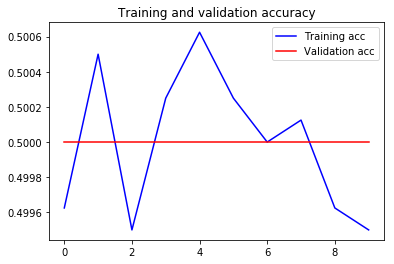

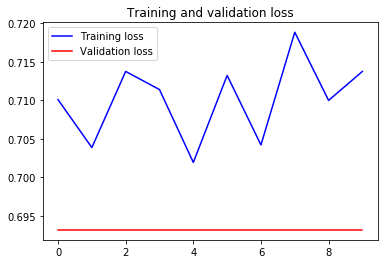

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [13]:
model.evaluate_generator(generator=validation_generator, steps=validation_generator.samples/validation_generator.batch_size)

[0.6931471824645996, 0.5]

In [15]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
)

Found 2000 images belonging to 1 classes.


In [18]:
pred=model.predict_generator(test_generator,steps=test_generator.n//test_generator.batch_size,verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
print("Nueral Network Output Results")
print("-----------------------------")
for actual, expected in zip(filenames, predictions):
    print("Actual Picture = " + actual, "\nExpected Output = " + expected)
    print("\n")

2000/2000 [==============================] - 22s 11ms/step
Nueral Network Output Results
-----------------------------
Actual Picture = test_folder/cat.4001.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4002.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4003.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4004.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4005.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4006.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4007.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4008.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4009.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4010.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4011.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4012.jpg 
Expected Output = cats


Actual Picture = test_folder/cat.4013.jpg 
Expected Output = cats

In [1]:
#!git clone -l -s git://github.com/aiman1717a/ai_project.git ai_project

Cloning into 'ai_project'...
remote: Enumerating objects: 10044, done.
remote: Counting objects: 100% (10044/10044), done.
remote: Compressing objects: 100% (10039/10039), done.
remote: Total 10044 (delta 8), reused 10029 (delta 2), pack-reused 0
Receiving objects: 100% (10044/10044), 217.53 MiB | 51.81 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (12006/12006), done.


In [19]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12195043584482627432
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13099913106768684133
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8251399252533188858
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12675024279189671688
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
